### IPD440 - APRENDIZAJE DE MAQUINAS
# Tarea 2

Nombre: Daniel Barriga Villanueva   
Rol: 202030517-K    
RUT: 20.731.884-1   
Correo: daniel.barriga@usm.cl   

## Introducción

El objetivo de esta tarea es aprender a construir redes neuronales desde cero y analizar como los diferentes hiperparámetros de un modelo influyen en las predicciones.

## Librerías

Importar todas las librerías que necesitará para el trabajo. Asegúrese de tener instalado `matplotlib`, `keras` y `sklearn`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import tensorflow.keras as keras
import tensorflow.keras.optimizers as optimizers #Debido a mi procesador, debo utilizar los optimizers de esa forma
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.regularizers import l2  # Asegúrate de importar l2

## Dataset

Se trabajará con un dataset generado por medio de la función `make_waves` que entrega dos ondas sinusoidales de diferentes clases.

In [2]:
def make_waves():
    c = 1000
    num = 1000
    step = num/(c*4)
    np.random.seed(0)
    x0 = np.linspace(-c*np.pi, c*np.pi, num)
    x1 = np.sin(x0)
    x2 = np.cos(x0)
    noise = np.random.normal(0, 0.1, num) + 0.1    
    x1 += np.sign(x1) * np.abs(noise)
    x2 += np.sign(x2) * np.abs(noise)
    x0 = x0 + (np.asarray(range(num)) / step) * 0.3
    X1 = np.column_stack((x0, x1))
    X2 = np.column_stack((x0, x2))
    y1 = np.asarray([0] * len(x0))
    y2 = np.asarray([1] * len(x0))
    X = np.concatenate((X1, X2), axis=0)
    y = np.concatenate((y1, y2), axis=0)
    return X, y

In [3]:
X, y = make_waves()

In [4]:
X

array([[-3.14159265e+03,  2.76405235e-01],
       [-3.13410318e+03,  1.46305154e-01],
       [-3.12661370e+03,  2.10452416e-01],
       ...,
       [ 4.32541370e+03,  1.10934012e+00],
       [ 4.33290318e+03,  1.01474132e+00],
       [ 4.34039265e+03,  1.06418859e+00]])

In [5]:
y

array([0, 0, 0, ..., 1, 1, 1])

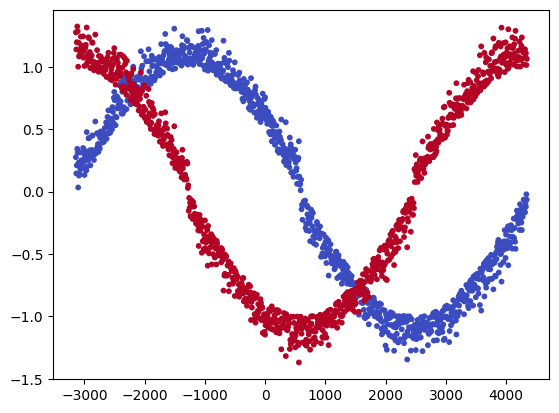

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=plt.cm.coolwarm)
plt.show()

## Desarrollo

Implementar, entrenar y calcular la `accuracy` para 5 modelos neuronales de tipo secuencial (`Sequential`) diferentes:

* En primera instancia separamos los datos, para entrenamiento, prueba

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


* Además definimos la función de plot_model_acurracy con la finalidad de comparar 'loss' y 'acurracy' del modelo

In [8]:
def plot_model_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy', 'loss'], loc='best')
    plt.show()

### Modelo 1
- Una sola capa de salida de tipo Densa (`Dense`) con activación `sigmoid`.
- Iteraciones (`epochs`): 10.
- Optimizador (`optimizer`): `'sgd'`.

In [9]:
# Construir el modelo
model1 = Sequential()
model1.add(Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))
optimizer_SGD = optimizers.legacy.SGD(learning_rate=0.00001)
# Compilar el modelo
model1.compile(optimizer=optimizer_SGD, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_model1 = model1.fit(X_train, y_train, epochs=10)


Epoch 1/10
50/50 [==============================] - 0s 921us/step - loss: 38.5134 - accuracy: 0.5288
Epoch 2/10
50/50 [==============================] - 0s 738us/step - loss: 4.4359 - accuracy: 0.5113
Epoch 3/10
50/50 [==============================] - 0s 411us/step - loss: 4.6214 - accuracy: 0.5069
Epoch 4/10
50/50 [==============================] - 0s 475us/step - loss: 4.4310 - accuracy: 0.5200
Epoch 5/10
50/50 [==============================] - 0s 461us/step - loss: 4.3369 - accuracy: 0.5238
Epoch 6/10
50/50 [==============================] - 0s 481us/step - loss: 5.1709 - accuracy: 0.5075
Epoch 7/10
50/50 [==============================] - 0s 579us/step - loss: 4.6324 - accuracy: 0.5113
Epoch 8/10
50/50 [==============================] - 0s 639us/step - loss: 5.2636 - accuracy: 0.5050
Epoch 9/10
50/50 [==============================] - 0s 451us/step - loss: 4.2361 - accuracy: 0.5387
Epoch 10/10
50/50 [==============================] - 0s 501us/step - loss: 4.5316 - accuracy: 0.523

In [10]:
# Evaluar el modelo
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


13/13 [==============================] - 0s 526us/step - loss: 1.1727 - accuracy: 0.5350
Accuracy: 53.50%


* Visualizando la variación entre el loss y accuracy

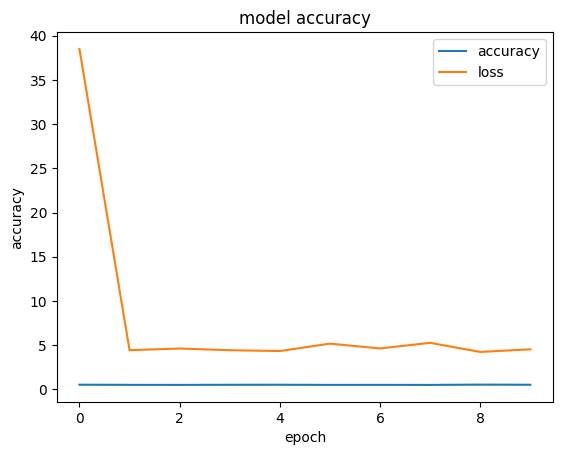

In [11]:
plot_model_accuracy(history_model1)

### Modelo 2
- Una sola capa de salida de tipo Densa (`Dense`) con activación `sigmoid`.
- Iteraciones (`epochs`): 1000.
- Optimizador (`optimizer`): `'sgd'`.

In [12]:
# Construir el modelo
model2 = Sequential()
model2.add(Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))
optimizer_SGD = optimizers.legacy.SGD(learning_rate=0.00001)
# Compilar el modelo
model2.compile(optimizer=optimizer_SGD, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_model2 = model2.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
50/50 [==============================] - 0s 648us/step - loss: 11.5949 - accuracy: 0.5069
Epoch 2/1000
50/50 [==============================] - 0s 587us/step - loss: 4.6967 - accuracy: 0.5000
Epoch 3/1000
50/50 [==============================] - 0s 409us/step - loss: 4.8367 - accuracy: 0.4938
Epoch 4/1000
50/50 [==============================] - 0s 370us/step - loss: 4.3078 - accuracy: 0.5181
Epoch 5/1000
50/50 [==============================] - 0s 392us/step - loss: 4.3255 - accuracy: 0.5200
Epoch 6/1000
50/50 [==============================] - 0s 417us/step - loss: 4.6865 - accuracy: 0.5100
Epoch 7/1000
50/50 [==============================] - 0s 379us/step - loss: 4.3881 - accuracy: 0.5163
Epoch 8/1000
50/50 [==============================] - 0s 364us/step - loss: 5.1763 - accuracy: 0.4881
Epoch 9/1000
50/50 [==============================] - 0s 377us/step - loss: 4.4162 - accuracy: 0.5181
Epoch 10/1000
50/50 [==============================] - 0s 417us/step - loss: 4.59

In [13]:
loss, accuracy = model2.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy * 100:.2f}%')

63/63 [==============================] - 0s 386us/step - loss: 8.3518 - accuracy: 0.5015
Loss: 8.351774215698242, Accuracy: 50.15%


* Visualizando la variación entre el loss y accuracy

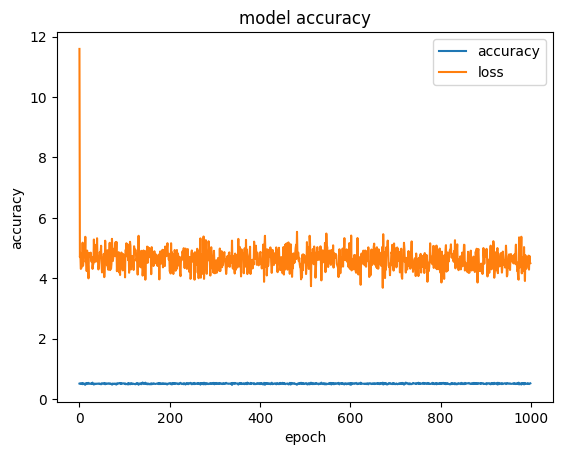

In [14]:
plot_model_accuracy(history_model2)

### Modelo 3
- Apile 3 capas ocultas de tipo Densa (`Dense`) con 8,4,2, neuronas respectivamente y activación `'tanh'`. Mantenga la misma capa de salida con activación `sigmoid`.
- Iteraciones (`epochs`): 100.
- Optimizador (`optimizer`): `'sgd'`.

In [15]:
# Inicializar el modelo
model3 = Sequential()

# Añadir capas ocultas con inicialización de Glorot
model3.add(Dense(8, activation='tanh', input_shape=(2,), kernel_initializer='glorot_normal'))
model3.add(Dense(4, activation='tanh', kernel_initializer='glorot_normal'))
model3.add(Dense(2, activation='tanh', kernel_initializer='glorot_normal'))

# Añadir capa de salida
model3.add(Dense(1, activation='sigmoid'))

# Compilar el modelo con una tasa de aprendizaje ajustada
optimizer_SGD = optimizers.legacy.SGD(learning_rate=0.01)
model3.compile(optimizer=optimizer_SGD, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con un tamaño de batch diferente (opcional)
history_model3 = model3.fit(X_train, y_train, epochs=100, batch_size=32)



Epoch 1/100
50/50 [==============================] - 0s 455us/step - loss: 0.7170 - accuracy: 0.5106
Epoch 2/100
50/50 [==============================] - 0s 417us/step - loss: 0.6939 - accuracy: 0.5075
Epoch 3/100
50/50 [==============================] - 0s 401us/step - loss: 0.6940 - accuracy: 0.4913
Epoch 4/100
50/50 [==============================] - 0s 389us/step - loss: 0.6939 - accuracy: 0.5081
Epoch 5/100
50/50 [==============================] - 0s 384us/step - loss: 0.6939 - accuracy: 0.4925
Epoch 6/100
50/50 [==============================] - 0s 378us/step - loss: 0.6937 - accuracy: 0.5019
Epoch 7/100
50/50 [==============================] - 0s 375us/step - loss: 0.6935 - accuracy: 0.4988
Epoch 8/100
50/50 [==============================] - 0s 380us/step - loss: 0.6934 - accuracy: 0.5056
Epoch 9/100
50/50 [==============================] - 0s 378us/step - loss: 0.6932 - accuracy: 0.5081
Epoch 10/100
50/50 [==============================] - 0s 381us/step - loss: 0.6943 - accura

In [16]:
# Evaluar el modelo
loss, accuracy = model3.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy * 100:.2f}%')


63/63 [==============================] - 0s 412us/step - loss: 0.6936 - accuracy: 0.4985
Loss: 0.6935678124427795, Accuracy: 49.85%


* Visualizando la variación entre el loss y accuracy

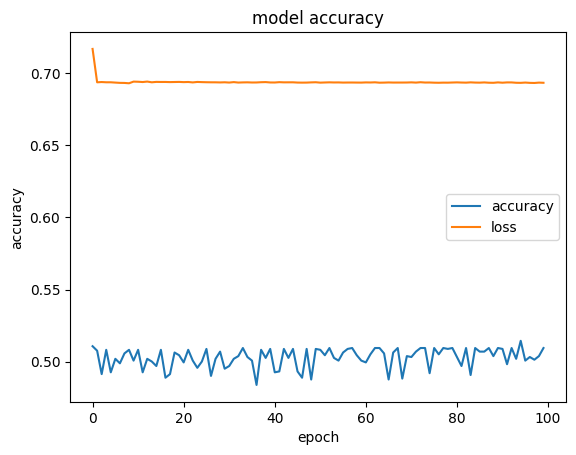

In [17]:
plot_model_accuracy(history_model3)

### Modelo 4
- Apile 3 capas ocultas de tipo Densa (`Dense`) con 8,4,2, neuronas respectivamente y activación `'tanh'`. Mantenga la misma capa de salida con activación `sigmoid`.
- Iteraciones (`epochs`): 100.
- Optimizador (`optimizer`): `'adam'`.

In [18]:
# Inicializar el modelo
model4 = Sequential()

# Añadir capas ocultas
model4.add(Dense(8, activation='tanh', input_shape=(2,)))
model4.add(Dense(4, activation='tanh'))
model4.add(Dense(2, activation='tanh'))

# Añadir capa de salida
model4.add(Dense(1, activation='sigmoid'))

# Compilar el modelo con el optimizador 'adam'
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_model4 = model4.fit(X_train, y_train, epochs=100, batch_size=32)




Epoch 1/100
50/50 [==============================] - 0s 494us/step - loss: 0.6963 - accuracy: 0.4894
Epoch 2/100
50/50 [==============================] - 0s 464us/step - loss: 0.6929 - accuracy: 0.4931
Epoch 3/100
50/50 [==============================] - 0s 463us/step - loss: 0.6928 - accuracy: 0.5131
Epoch 4/100
50/50 [==============================] - 0s 430us/step - loss: 0.6929 - accuracy: 0.5019
Epoch 5/100
50/50 [==============================] - 0s 424us/step - loss: 0.6924 - accuracy: 0.5144
Epoch 6/100
50/50 [==============================] - 0s 426us/step - loss: 0.6889 - accuracy: 0.5394
Epoch 7/100
50/50 [==============================] - 0s 422us/step - loss: 0.6874 - accuracy: 0.5362
Epoch 8/100
50/50 [==============================] - 0s 420us/step - loss: 0.6898 - accuracy: 0.5275
Epoch 9/100
50/50 [==============================] - 0s 435us/step - loss: 0.6805 - accuracy: 0.5644
Epoch 10/100
50/50 [==============================] - 0s 469us/step - loss: 0.6844 - accura

In [19]:
# Evaluar el modelo
loss, accuracy = model4.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy * 100:.2f}%')

63/63 [==============================] - 0s 409us/step - loss: 0.4659 - accuracy: 0.7085
Loss: 0.46589648723602295, Accuracy: 70.85%


* Visualizando la variación entre el loss y accuracy

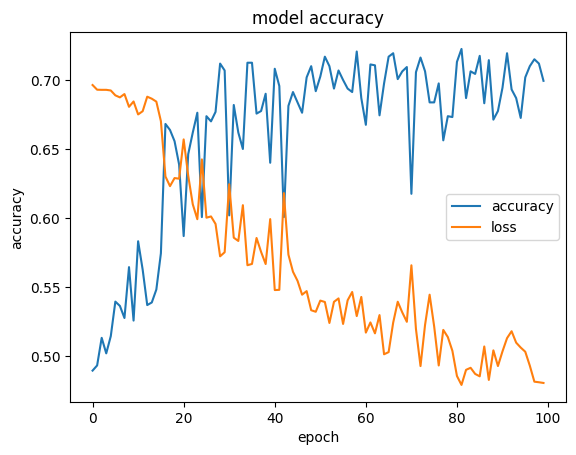

In [20]:
plot_model_accuracy(history_model4)

### Modelo 5
- Apile 7 capas ocultas de tipo Densa (`Dense`) con 128,64,32,16,8,4,2 neuronas respectivamente y activación `'relu'`. Mantenga la misma capa de salida con activación `sigmoid`.
- Iteraciones (`epochs`): 100.
- Optimizador (`optimizer`): `'adam'`.

In [21]:
# Inicializar el modelo
model5 = Sequential()

# Añadir capas ocultas con inicialización de He y regularización L2
model5.add(Dense(128, activation='relu', input_shape=(2,), kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model5.add(BatchNormalization())
model5.add(Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model5.add(BatchNormalization())
model5.add(Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model5.add(BatchNormalization())
model5.add(Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model5.add(BatchNormalization())
model5.add(Dense(8, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model5.add(BatchNormalization())
model5.add(Dense(4, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model5.add(BatchNormalization())
model5.add(Dense(2, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model5.add(BatchNormalization())

# Añadir capa de salida
model5.add(Dense(1, activation='sigmoid'))

# Ajustar la tasa de aprendizaje del optimizador Adam
optimizer_adam = keras.optimizers.Adam(learning_rate=0.001)
model5.compile(optimizer=optimizer_adam, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con early stopping
history_model5 = model5.fit(X_train, y_train, epochs=100, batch_size=32)




Epoch 1/100
50/50 [==============================] - 1s 1ms/step - loss: 5.8288 - accuracy: 0.5537
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 5.3840 - accuracy: 0.6081
Epoch 3/100
50/50 [==============================] - 0s 982us/step - loss: 5.0541 - accuracy: 0.6125
Epoch 4/100
50/50 [==============================] - 0s 960us/step - loss: 4.6885 - accuracy: 0.6331
Epoch 5/100
50/50 [==============================] - 0s 978us/step - loss: 4.3915 - accuracy: 0.6425
Epoch 6/100
50/50 [==============================] - 0s 987us/step - loss: 4.1197 - accuracy: 0.6519
Epoch 7/100
50/50 [==============================] - 0s 971us/step - loss: 3.8437 - accuracy: 0.7056
Epoch 8/100
50/50 [==============================] - 0s 992us/step - loss: 3.6358 - accuracy: 0.6825
Epoch 9/100
50/50 [==============================] - 0s 975us/step - loss: 3.3867 - accuracy: 0.7287
Epoch 10/100
50/50 [==============================] - 0s 980us/step - loss: 3.2463 - accuracy: 

In [22]:
# Evaluar el modelo
loss, accuracy = model5.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy * 100:.2f}%')


63/63 [==============================] - 0s 583us/step - loss: 1.4599 - accuracy: 0.5585
Loss: 1.459914207458496, Accuracy: 55.85%


* Visualizando la variación entre el loss y accuracy

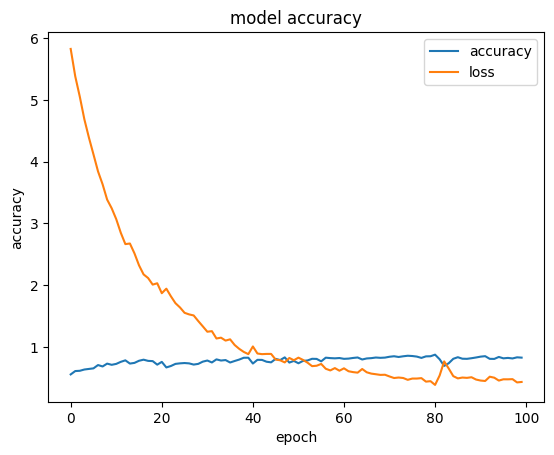

In [23]:
plot_model_accuracy(history_model5)

## Visualización resultados

Para cada modelo, graficar la frontera de decisión con la función `plot_decision_boundary`.

In [24]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = model.predict(ab, verbose=0)
    cc = c.reshape(aa.shape)
    fig, ax = plt.subplots()
    contour = plt.contourf(aa, bb, cc, cmap=plt.cm.coolwarm, alpha=0.6)
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)
    plt.show()

* Grafico Para modelo 1

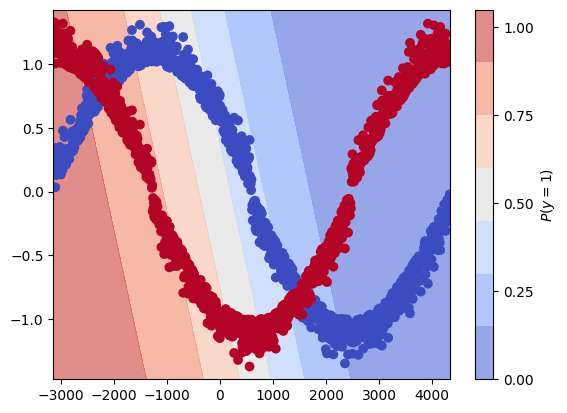

In [25]:
# Modelo 1
plot_decision_boundary(model1, X, y)



* Grafico Para modelo 2

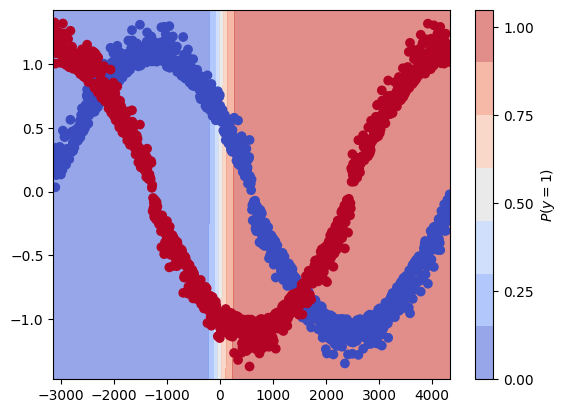

In [26]:
# Modelo 2
plot_decision_boundary(model2, X, y)


* Grafico Para modelo 3

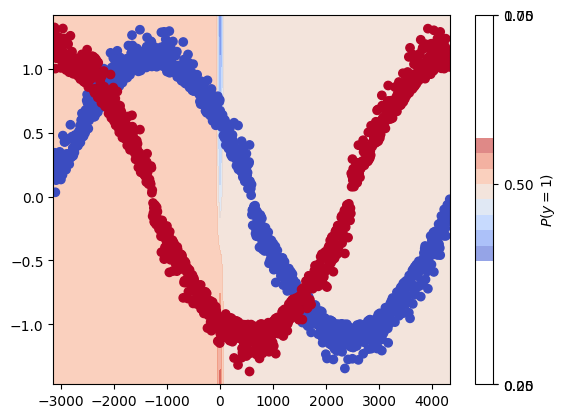

In [27]:
# Modelo 3
plot_decision_boundary(model3, X, y)


* Grafico Para modelo 4

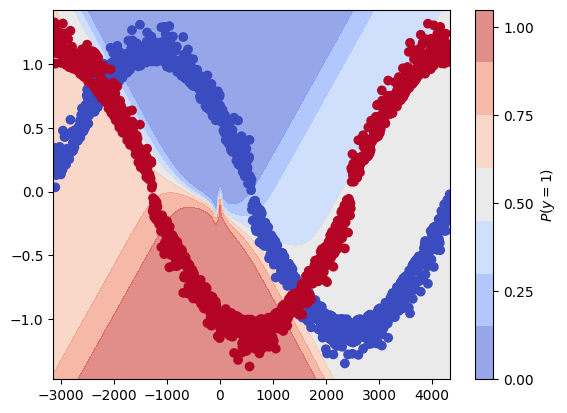

In [28]:
# Modelo 4
plot_decision_boundary(model4, X, y)


* Grafico Para modelo 5

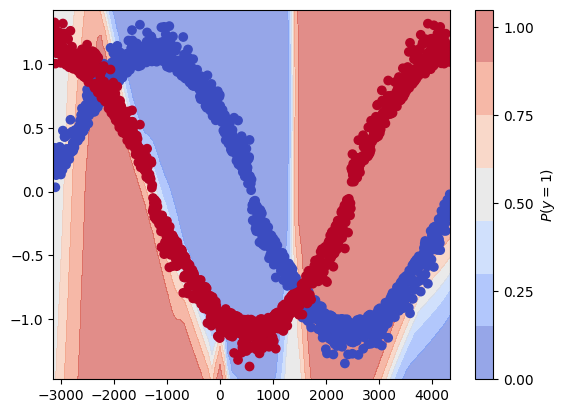

In [29]:
# Modelo 5
plot_decision_boundary(model5, X, y)

## Conclusiones

¿Cuál fue el modelo con mejor accuracy? ¿Cuál fue el hiperparámetro más importante (número de capas, iteraciones u optimizador)? ¿Qué relación aprecia entre el número de iteraciones, el número de capas y el número de neuronas? 

Basado en los resultados proporcionados para los distintos modelos, se puede concluir lo siguiente:

### Mejor Accuracy:
El **Modelo 4** ostenta la mayor precisión con un **70.85%** de accuracy, lo que lo destaca como el modelo más efectivo entre los evaluados.

### Hiperparámetro más importante:
- **Optimizador**: Se observa que el cambio de optimizador a **Adam** en el Modelo 4 resultó en una mejora significativa en la precisión en comparación con los otros modelos que usaban el optimizador **SGD**. Este cambio fue fundamental para alcanzar una mayor precisión, lo que sugiere que el optimizador es un hiperparámetro crucial en este escenario.

### Relación entre Número de Iteraciones, Número de Capas y Número de Neuronas:
#### Iteraciones (Epochs):
El número de iteraciones o epochs se refiere a cuántas veces el algoritmo de entrenamiento ve el conjunto completo de datos. En teoría, más iteraciones podrían permitir que el modelo aprenda mejor los patrones en los datos. Sin embargo, en el caso de los **Modelos 1 y 2**, incrementar las epochs a **1000** no resultó en una mejora notable en la precisión. Varias razones podrían explicar esto:

1. **Convergencia Prematura**: Si la tasa de aprendizaje es muy baja o la inicialización de los pesos no es adecuada, el modelo podría converger prematuramente a un mínimo local en la función de pérdida, lo que resulta en un desempeño subóptimo.
2. **Sobreajuste (Overfitting)**: Con muchas iteraciones, existe el riesgo de que el modelo memorice los datos de entrenamiento en lugar de aprender patrones generalizables, especialmente si el modelo es complejo y los datos son limitados.

#### Número de Capas y Neuronas:
La arquitectura de un modelo, incluyendo el número de capas y neuronas, es crucial para su capacidad para capturar patrones complejos en los datos. El **Modelo 5** incorporó más capas y neuronas en comparación con el **Modelo 4**, pero no logró una mejora significativa en la precisión.

1. **Ajuste Excesivo de la Complejidad**: A veces, un modelo más complejo con más capas y neuronas puede ser demasiado para los datos disponibles, lo que puede resultar en un modelo que no mejora o incluso empeora el desempeño.
2. **Dificultad en la Optimización**: Los modelos más complejos pueden ser más difíciles de entrenar y optimizar, lo que puede resultar en una convergencia a soluciones subóptimas.

#### Inicialización y Regularización en el Modelo 5:
La inicialización adecuada de los pesos y la regularización son técnicas importantes para ayudar a un modelo a entrenar de manera efectiva y generalizar bien a datos no vistos. Sin embargo, en el **Modelo 5**, a pesar de aplicar inicialización de He y regularización L2, no se observó una mejora significativa en la precisión.

1. **Elección de Hiperparámetros**: Los hiperparámetros utilizados para la inicialización y la regularización podrían no ser los óptimos para esta tarea específica, lo que resulta en un desempeño subóptimo.
2. **Inadecuada Configuración de Regularización**: La regularización L2 añade una penalización a los pesos grandes, lo que puede ayudar a prevenir el sobreajuste. Pero si la regularización es demasiado fuerte, podría suprimir la capacidad del modelo para aprender de los datos.

### Observaciones Adicionales:
- Es notable que a pesar de las variaciones en la configuración de los modelos, muchos de ellos se estancaron alrededor de una precisión del **50%**. Esto puede indicar que los modelos estaban luchando por aprender la estructura subyacente de los datos y sugiere que podría ser útil explorar otras arquitecturas de modelos, funciones de activación, o incluso preprocesamiento de datos para mejorar el rendimiento.

Estas conclusiones subrayan la importancia de la elección y afinación de hiperparámetros, y cómo diferentes configuraciones pueden influir en la capacidad de un modelo para aprender de los datos proporcionados. También resalta la necesidad de explorar diferentes arquitecturas y técnicas para mejorar el rendimiento del modelo en tareas de clasificación binaria como la presentada.